# Loaners data prediction

Contributors : PUPAT Lucas, MOUSSAVI Cambyse, PORCHER Lenny

This notebook aims to predict whether a loan application will be approved or not. It walks through the entire workflow, including data preprocessing, data visualisation, feature engineering, and the application of both machine learning and deep learning models. Each step is detailed to provide a clear understanding of the decision-making process and model performance evaluation.

Original data source: [BCR - Loaners Data for Solvency Prediction](
https://www.kaggle.com/datasets/benjamincornurota/bcr-loaners-data-for-solvency-prediction/data)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## I. Load Dataset

In [2]:
# Load CSV file
df = pd.read_csv('loaners_training_data_for_ml.csv')

# Show the first few rows of the dataset
print(df.head())

   Unnamed: 0  SK_ID_CURR NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           0      100002         Cash loans           M            N   
1           1      100003         Cash loans           F            N   
2           2      100004    Revolving loans           M            Y   
3           3      100006         Cash loans           F            N   
4           4      100007         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  REGION_RATING_CLIENT_W_CITY  WEEKDAY_APPR_PROCESS_START  \
0  ...                   

In [3]:
# Basic dataset overview
print("Dataset Overview:")
print("Number of rows:", len(df))
print("Number of columns:", len(df.columns))

Dataset Overview:
Number of rows: 307511
Number of columns: 42


## II. Columns descriptions :

This dataset includes several qualitative variables.

The remaining columns can be divided into two groups:
1. Nominal columns :
  - **NAME_CONTRACT_TYPE** :	Type of loan contract requested (Cash loans, etc.).
  - **CODE_GENDER** :	Gender of the applicant (M = Male, F = Female).
  - **FLAG_OWN_CAR** :	Indicates if the applicant owns a car (Y = Yes, N = No).
  - **FLAG_OWN_REALTY** :	Indicates if the applicant owns real estate property (Y = Yes, N = No).
  - **NAME_TYPE_SUITE** :	Who was accompanying the applicant when applying (e.g., Unaccompanied, Family, etc.).
  - **NAME_INCOME_TYPE** :	Source of income (Working, Pensioner, Businessman, etc.).
  - **NAME_FAMILY_STATUS** :	Marital/family status (Married, Single, Widow, etc.).
  - **NAME_HOUSING_TYPE** :	Type of housing (House / apartment, With parents, Rented apartment, etc.).
  - **FLAG_MOBIL** :	Whether the applicant provided a mobile number (1 = Yes, 0 = No).
  - **FLAG_EMP_PHONE** :	Whether the applicant provided a work phone number.
  - **FLAG_WORK_PHONE** :	Indicates if the applicant has a work phone.
  - **FLAG_CONT_MOBILE** :	Whether the mobile phone number is reachable.
  - **FLAG_PHONE** :	Whether the applicant provided a home phone number.
  - **FLAG_EMAIL** :	Whether the applicant provided an email address.
  - **REG_REGION_NOT_LIVE_REGION** :	Whether the applicant’s registered region differs from the living region.
  - **REG_REGION_NOT_WORK_REGION** :	Whether the applicant’s registered region differs from the working region.
  - **LIVE_REGION_NOT_WORK_REGION** :	Whether the living region differs from the working region.
  - **REG_CITY_NOT_LIVE_CITY** :	Whether the registered city is different from the living city.
  - **REG_CITY_NOT_WORK_CITY** :	Whether the registered city is different from the working city.
  - **LIVE_CITY_NOT_WORK_CITY** :	Whether the living city is different from the working city.
2. Ordinal values :
  - **NAME_EDUCATION_TYPE** :	Highest education level attained.
  - **REGION_RATING_CLIENT** :	Rating of the region where the client lives (by external source).
  - **REGION_RATING_CLIENT_W_CITY** :	Regional rating taking into account the city.
  - **REVENUE_CLASS** :	Income class (encoded numerically).
  - **WEEKDAY_APPR_PROCESS_START** :	Day of the week when the application process started.

This dataset includes several quantitative variables too.

There is 2 differents kind of variables :
1. Discrete values :
  - **Unnamed: 0** :	Index column from the original file, not relevant for analysis.
  - **SK_ID_CURR** :	Unique identifier for each loan applicant.
  - **CNT_CHILDREN** :	Number of children or dependents.
  - **NUM_ANNUITY** :	Number of annuity payments.
  - **LOANER_AGE** :	Age of the applicant.
  - **YEARS_EMPLOYED** :	Number of years the applicant has been employed.
  - **DAYS_REGISTRATION** :	Number of days since the applicant registered in the system (negative value indicates days ago).
  - **DAYS_ID_PUBLISH** :	Days since the applicant’s ID was last changed or updated.
  - **CNT_FAM_MEMBERS** :	Number of family members.
  - **HOUR_APPR_PROCESS_START** :	Hour of the day when the application process started.
  - **TARGET** : Target variable: 0 if the loan was approved, 1 if it was rejected.
2. Continuous values :
  - **AMT_INCOME_TOTAL** :	Applicant's total income.
  - **AMT_CREDIT** :	Total credit amount of the loan requested.
  - **AMT_ANNUITY** :	Loan annuity amount — the expected periodic payment.
  - **AMT_GOODS_PRICE** :	Price of the goods for which the loan is given.
  - **CREDIT_SHARE** :	Ratio of the loan to the income or other credit-related metric.
  - **REGION_POPULATION_RELATIVE** :	Represents the relative population density of the applicant's region compared to the most populated region in the dataset.


## III. Managing undefined values

In [4]:
# Check for missing values
print("Missing Values by Column:")
print(df.isnull().sum())

Missing Values by Column:
Unnamed: 0                        0
SK_ID_CURR                        0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       4
FLAG_OWN_CAR                      0
FLAG_OWN_REALTY                   0
CNT_CHILDREN                      0
AMT_INCOME_TOTAL                  0
AMT_CREDIT                        0
AMT_ANNUITY                      12
AMT_GOODS_PRICE                 278
NUM_ANNUITY                      12
CREDIT_SHARE                      0
LOANER_AGE                        0
YEARS_EMPLOYED                    0
REVENUE_CLASS                     0
NAME_TYPE_SUITE                1292
NAME_INCOME_TYPE                  0
NAME_EDUCATION_TYPE               0
NAME_FAMILY_STATUS                2
NAME_HOUSING_TYPE                 0
REGION_POPULATION_RELATIVE        0
DAYS_REGISTRATION                 0
DAYS_ID_PUBLISH                   0
FLAG_MOBIL                        0
FLAG_EMP_PHONE                    0
FLAG_WORK_PHONE                   0
FL

In [5]:
# Delete rows where values or undefined and with low impact
df.dropna(subset=['TARGET', 'AMT_ANNUITY', 'CODE_GENDER', 'CNT_FAM_MEMBERS'], inplace=True)

In [6]:
# Handle missing AMT_GOODS_PRICE using median imputation
print("AMT_GOODS_PRICE Stats:")
print(df['AMT_GOODS_PRICE'].describe())
print("We observe a big difference between max and min, that's why we will use median average to avoid the impact of outliers on the result.")
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)

AMT_GOODS_PRICE Stats:
count    3.072170e+05
mean     5.383989e+05
std      3.694492e+05
min      4.050000e+04
25%      2.385000e+05
50%      4.500000e+05
75%      6.795000e+05
max      4.050000e+06
Name: AMT_GOODS_PRICE, dtype: float64
We observe a big difference between max and min, that's why we will use median average to avoid the impact of outliers on the result.


/tmp/ipython-input-6-269673240.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].median(), inplace=True)


In [7]:
# Handle missing NAME_TYPE_SUITE using mode imputation
print("NAME_TYPE_SUITE Stats:")
print(df['NAME_TYPE_SUITE'].value_counts())
df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)

NAME_TYPE_SUITE Stats:
NAME_TYPE_SUITE
Unaccompanied      248512
Family              40147
Spouse, partner     11370
Children             3267
Other_B              1770
Other_A               866
Group of people       271
Name: count, dtype: int64


/tmp/ipython-input-7-2717587912.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['NAME_TYPE_SUITE'].fillna(df['NAME_TYPE_SUITE'].mode()[0], inplace=True)


In [8]:
print("Final Missing Values Check:")
print(df.isnull().sum())

print("Rows number:", len(df))
print("Data preprocessing complete.")

Final Missing Values Check:
Unnamed: 0                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
CODE_GENDER                    0
FLAG_OWN_CAR                   0
FLAG_OWN_REALTY                0
CNT_CHILDREN                   0
AMT_INCOME_TOTAL               0
AMT_CREDIT                     0
AMT_ANNUITY                    0
AMT_GOODS_PRICE                0
NUM_ANNUITY                    0
CREDIT_SHARE                   0
LOANER_AGE                     0
YEARS_EMPLOYED                 0
REVENUE_CLASS                  0
NAME_TYPE_SUITE                0
NAME_INCOME_TYPE               0
NAME_EDUCATION_TYPE            0
NAME_FAMILY_STATUS             0
NAME_HOUSING_TYPE              0
REGION_POPULATION_RELATIVE     0
DAYS_REGISTRATION              0
DAYS_ID_PUBLISH                0
FLAG_MOBIL                     0
FLAG_EMP_PHONE                 0
FLAG_WORK_PHONE                0
FLAG_CONT_MOBILE               0
FLAG_PHONE                     0
FLAG_EMAIL     

## IV. Data Visualization

### A. Loan Approval Distribution

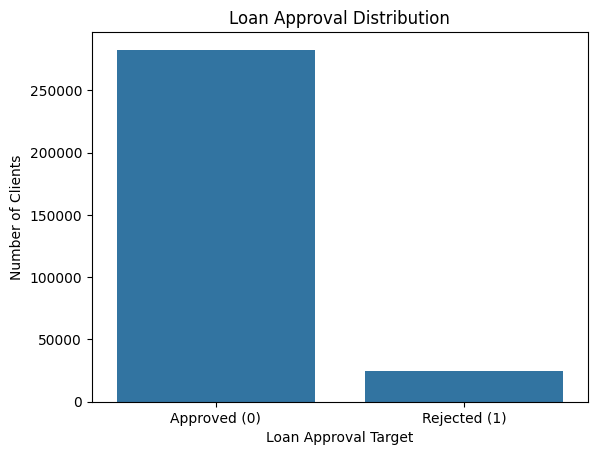

In [9]:
# Target variable distribution
sns.countplot(x='TARGET', data=df)
plt.xlabel('Loan Approval Target')
plt.ylabel('Number of Clients')
plt.title('Loan Approval Distribution')
plt.xticks([0, 1], ['Approved (0)', 'Rejected (1)'])
plt.show()

In [10]:
approval_ratio = df[df['TARGET'] == 0].shape[0] / df.shape[0]
print(f"✅ Approval Ratio: {round(approval_ratio * 100, 2)} %")

✅ Approval Ratio: 91.93 %


The dataset is highly imbalanced — 91.93% of the clients were approved for a loan. This imbalance might bias our model toward predicting approvals.

### B. Borrower Demographics

#### 1. Gender vs Loan Approval

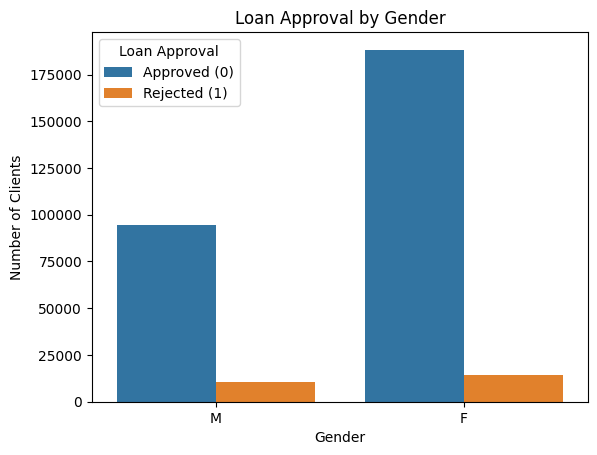

In [11]:
sns.countplot(x='CODE_GENDER', hue='TARGET', data=df)
plt.xlabel('Gender')
plt.ylabel('Number of Clients')
plt.title('Loan Approval by Gender')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

In [12]:
# Approval rate by gender
male_approval = df[df['CODE_GENDER'] == 'M']['TARGET'].value_counts(normalize=True)[0] * 100
female_approval = df[df['CODE_GENDER'] == 'F']['TARGET'].value_counts(normalize=True)[0] * 100

print(f"Male approval rate: {round(male_approval, 2)}%")
print(f"Female approval rate: {round(female_approval, 2)}%")

Male approval rate: 89.86%
Female approval rate: 93.0%


Women apply for more loans than men, and their approval rates are slightly higher, by around 3%. This may suggest a minor gender influence.

#### 2. Age vs Loan Approval

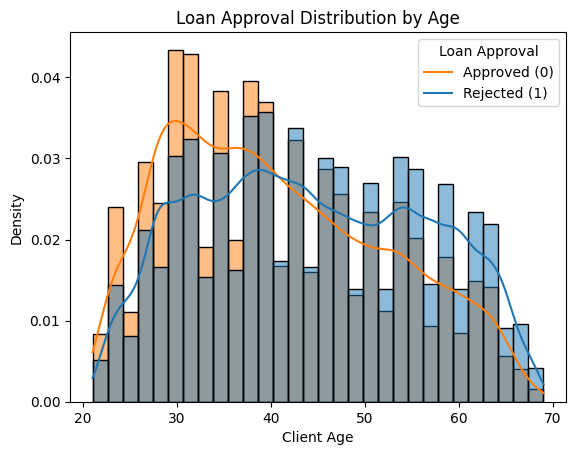

In [13]:
sns.histplot(data=df, x='LOANER_AGE', hue='TARGET', kde=True, bins=30, stat="density", common_norm=False)
plt.title('Loan Approval Distribution by Age')
plt.xlabel('Client Age')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Clients under 40 are more likely to be approved. Younger clients often seek loans for essentials (home, vehicle), whereas older clients may have less pressing needs or higher financial risk.

#### 3. Family Status and Loan Approval

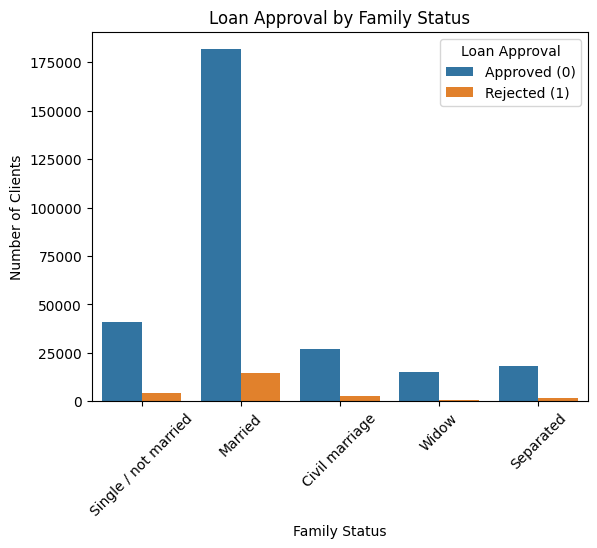

In [14]:
sns.countplot(data=df, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.title('Loan Approval by Family Status')
plt.xlabel('Family Status')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

This graph shows us one things that is important, the married people ask a lot for a loan. We can look better on the rate of acceptation.

In [15]:
df.groupby('NAME_FAMILY_STATUS')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2)).reset_index().rename(columns={'TARGET': 'Approval Rate (%)'}).sort_values('Approval Rate (%)', ascending=False)

,NAME_FAMILY_STATUS,Approval Rate (%)
4,Widow,94.18
1,Married,92.44
2,Separated,91.81
3,Single / not married,90.19
0,Civil marriage,90.05


Married clients make up a large portion of applicants. Widowed and separated individuals show relatively high approval rates, possibly due to increased financial support needs.

#### 4. Education Level and Income

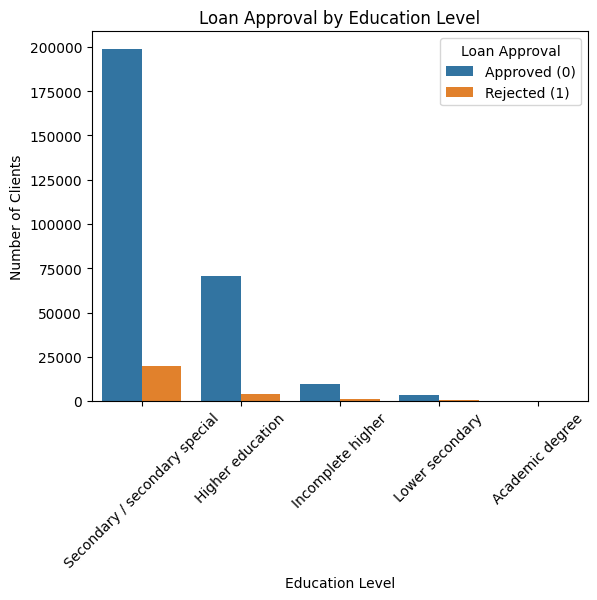

In [16]:
sns.countplot(data=df, x='NAME_EDUCATION_TYPE', hue='TARGET')
plt.title('Loan Approval by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

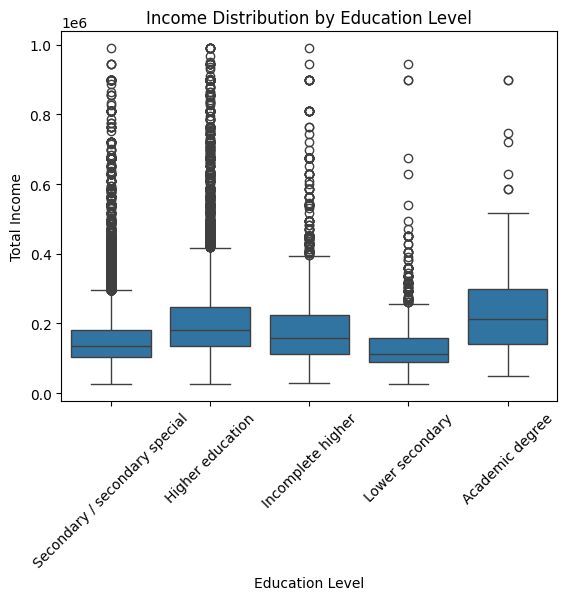

In [17]:
# Remove outliers to improve visualization
df = df[df['AMT_INCOME_TOTAL'] < 1000000]

sns.boxplot(data=df, x='NAME_EDUCATION_TYPE', y='AMT_INCOME_TOTAL')
plt.title('Income Distribution by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Income')
plt.xticks(rotation=45)
plt.show()

With those graphics we can see that people with a secondary background ask more for a loan. This can be explicate with the second graph, in fact there caterory has not so much exception that mean they need more support probably for studies or to enter in active life.

In [18]:
df.groupby('NAME_EDUCATION_TYPE')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2)).reset_index().rename(columns={'TARGET': 'Approval Rate (%)'}).sort_values('Approval Rate (%)', ascending=False)

,NAME_EDUCATION_TYPE,Approval Rate (%)
0,Academic degree,98.17
1,Higher education,94.64
2,Incomplete higher,91.52
4,Secondary / secondary special,91.06
3,Lower secondary,89.06


- Most applicants have a secondary education.

- Clients with higher education (academic degrees) have higher approval rates, likely due to job stability and higher income.

- Secondary education applicants may need loans to support education or early career costs, but their approval rate is slightly lower.

#### 5. Income Type and Loan Decision

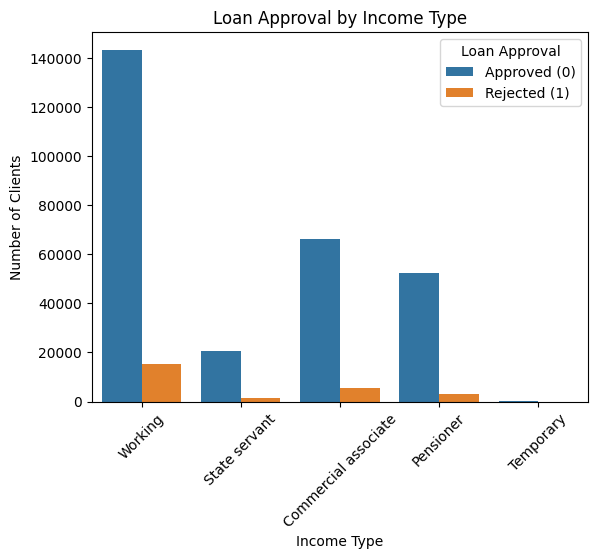

In [19]:
sns.countplot(data=df, x='NAME_INCOME_TYPE', hue='TARGET')
plt.title('Loan Approval by Income Type')
plt.xlabel('Income Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

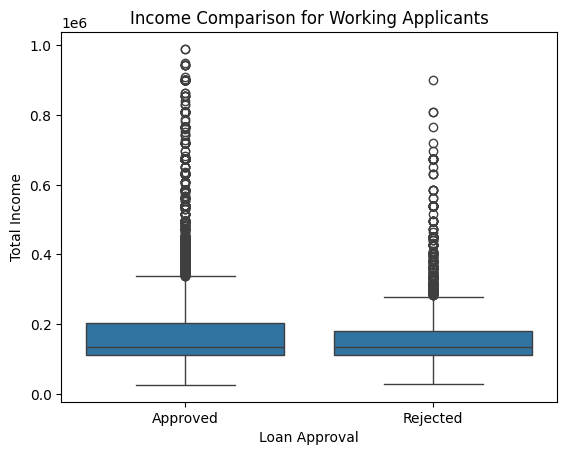

In [20]:
# Focus on working individuals
working_df = df[df['NAME_INCOME_TYPE'] == 'Working'][['TARGET', 'AMT_INCOME_TOTAL']]
sns.boxplot(data=working_df, x="TARGET", y="AMT_INCOME_TOTAL")
plt.title('Income Comparison for Working Applicants')
plt.xlabel('Loan Approval')
plt.xticks([0, 1], ["Approved", "Rejected"])
plt.ylabel('Total Income')
plt.show()

Stability matters. Workers represent a high number of approved loans. However, income alone does not strongly differentiate approved vs. rejected cases within this group.

#### 6. Housing Type

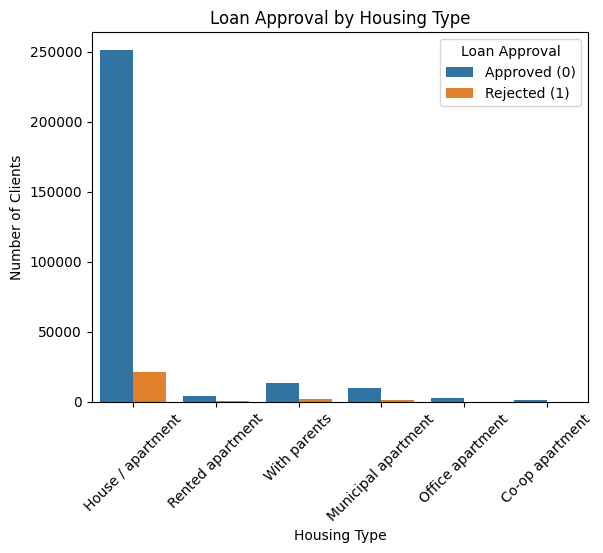

In [21]:
sns.countplot(data=df, x='NAME_HOUSING_TYPE', hue='TARGET')
plt.title('Loan Approval by Housing Type')
plt.xlabel('Housing Type')
plt.ylabel('Number of Clients')
plt.xticks(rotation=45)
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Clients living in stable housing (like houses or with parents) are more frequently approved. This supports the idea that perceived financial stability influences loan decisions.

#### 7. Children and Family Size

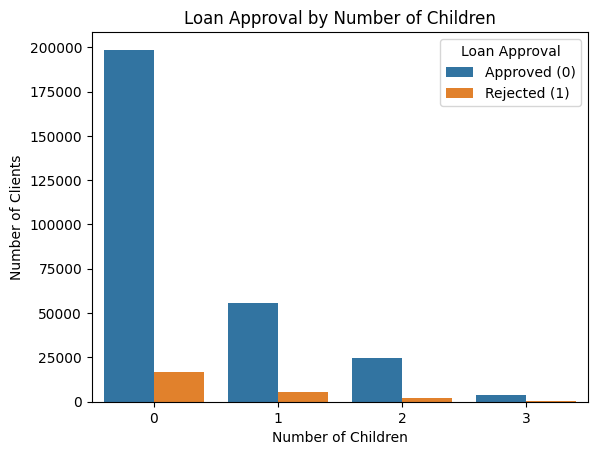

In [22]:
sns.countplot(data=df, x='CNT_CHILDREN', hue='TARGET')
plt.title('Loan Approval by Number of Children')
plt.xlabel('Number of Children')
plt.ylabel('Number of Clients')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

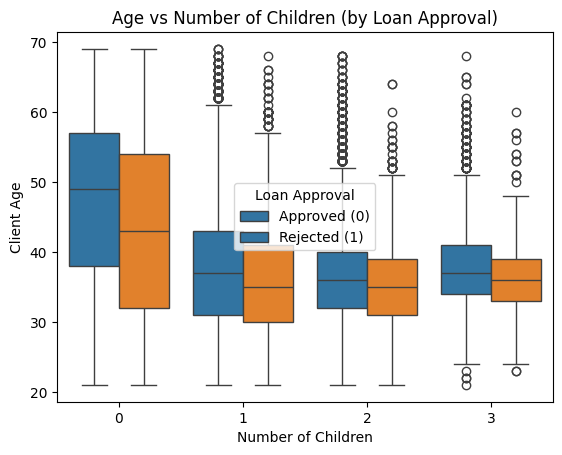

In [23]:
sns.boxplot(data=df, x='CNT_CHILDREN', y='LOANER_AGE', hue='TARGET')
plt.title('Age vs Number of Children (by Loan Approval)')
plt.xlabel('Number of Children')
plt.ylabel('Client Age')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Most applicants have few or no children. Clients with more than one child tend to be slightly older. The approval rate tends to decrease with more dependents, potentially due to financial pressure.

#### 8. Family Members Correlation

In [24]:
df['CNT_FAM_MEMBERS'].value_counts()

,count
CNT_FAM_MEMBERS,
2.0,158217
1.0,67802
3.0,52551
4.0,24673
5.0,3471
6.0,408
7.0,81
8.0,20
9.0,6


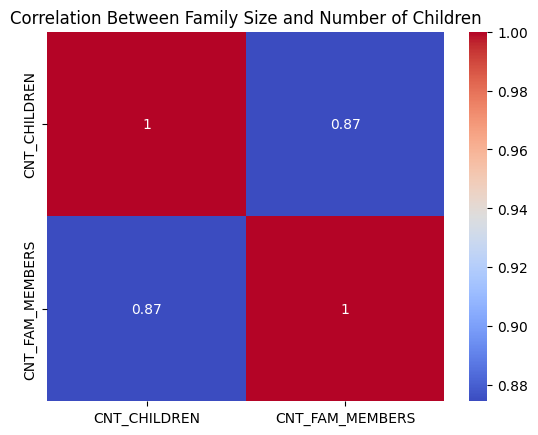

In [25]:
sns.heatmap(df[['CNT_CHILDREN', 'CNT_FAM_MEMBERS']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Family Size and Number of Children')
plt.show()

CNT_FAM_MEMBERS is highly correlated with CNT_CHILDREN and may contain inconsistent values. We may consider dropping this column to prevent redundancy and data noise.

#### 9. Asset Ownership and Loan Approval

In [26]:
def get_group(car, realty):
    if car == 'Y' and realty == 'Y':
        return 'Car + Realty'
    elif car == 'Y':
        return 'Only Car'
    elif realty == 'Y':
        return 'Only Realty'
    else:
        return 'Neither'

df['OWNERSHIP_GROUP'] = df.apply(lambda row: get_group(row['FLAG_OWN_CAR'], row['FLAG_OWN_REALTY']), axis=1)

df.groupby('OWNERSHIP_GROUP')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2)).reset_index().rename(columns={'TARGET': 'Approval Rate (%)'})

,OWNERSHIP_GROUP,Approval Rate (%)
0,Car + Realty,92.66
1,Neither,91.00
2,Only Car,92.95
3,Only Realty,91.72


Owning slightly improves the chances of approval, but the difference is marginal (~1%). Asset ownership shows a weak but positive correlation with loan acceptance.

#### 10. Employment Duration and Loan Approval

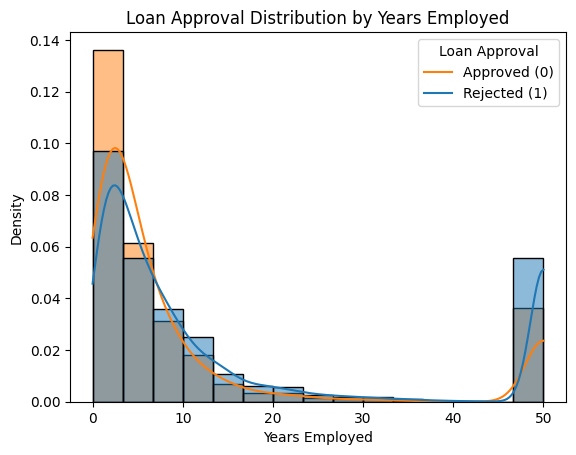

In [27]:
# Distribution of employment years by target
sns.histplot(data=df, x='YEARS_EMPLOYED', hue='TARGET', kde=True, bins=15, stat="density", common_norm=False)
plt.title('Loan Approval Distribution by Years Employed')
plt.xlabel('Years Employed')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

In [28]:
# Percentage of people employed for more than 20 years
over_20_years = df[df['YEARS_EMPLOYED'] > 20].shape[0]
total = df.shape[0]
print(f"Percentage of people employed for more than 20 years: {round(over_20_years / total * 100, 2)}%")

Percentage of people employed for more than 20 years: 21.82%


Applicants with less than 6 years of employment tend to have a higher approval rate. This might reflect the profile of younger borrowers starting their careers and seeking support for life milestones like housing or transportation.

On the other hand, clients with long employment histories (>20 years) are relatively rare — only ~21% of the dataset — and their approval rates appear slightly lower. This could be due to older age, financial independence, or fewer loan requests.

### C. Financial situation

#### 1. Income Distribution

Note: Outliers with AMT_INCOME_TOTAL > 1000000 have been removed for visualization clarity.

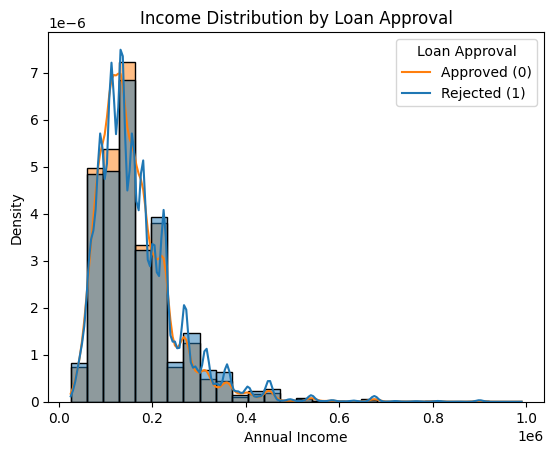

In [29]:
sns.histplot(data=df, x='AMT_INCOME_TOTAL', hue='TARGET', kde=True, bins=28, stat='density', common_norm=False)
plt.title('Income Distribution by Loan Approval')
plt.xlabel('Annual Income')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Applicants with an annual income below 200,000 are more likely to have their loan approved. However, extremely low income (below 50,000) tends to correlate with more rejections, suggesting a potential income threshold for eligibility.

#### 2. Credit Amount

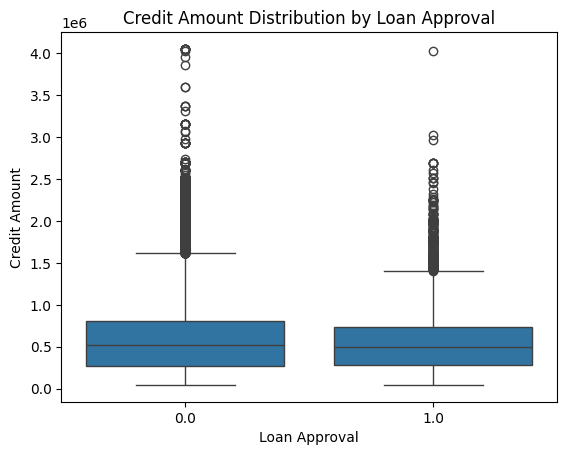

In [30]:
sns.boxplot(data=df, x='TARGET', y='AMT_CREDIT')
plt.title('Credit Amount Distribution by Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Credit Amount')
plt.show()

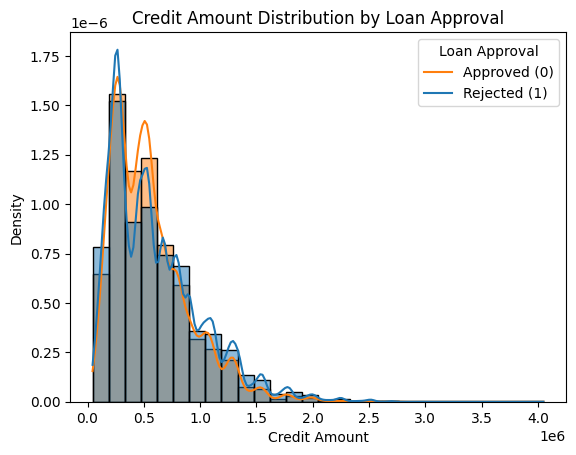

In [31]:
sns.histplot(data=df, x='AMT_CREDIT', hue='TARGET', kde=True, bins=28, stat='density', common_norm=False)
plt.title('Credit Amount Distribution by Loan Approval')
plt.xlabel('Credit Amount')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Loan applications with credit amounts between 300,000 and 700,000 are more frequently approved. Lowest and higher loan requests may represent higher risk and thus face more scrutiny.

#### 3. Annuity Amount

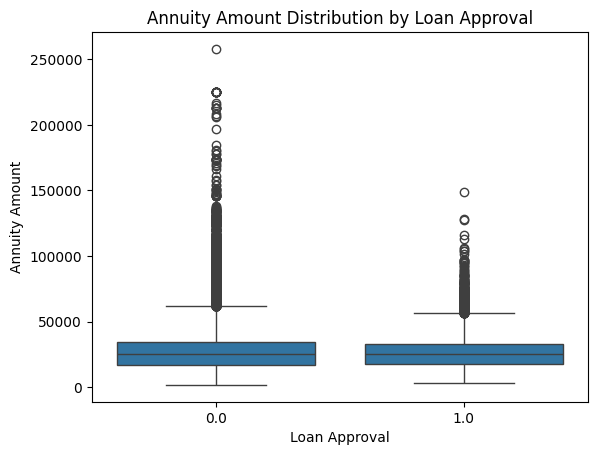

In [32]:
sns.boxplot(data=df, x='TARGET', y='AMT_ANNUITY')
plt.title('Annuity Amount Distribution by Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Annuity Amount')
plt.show()

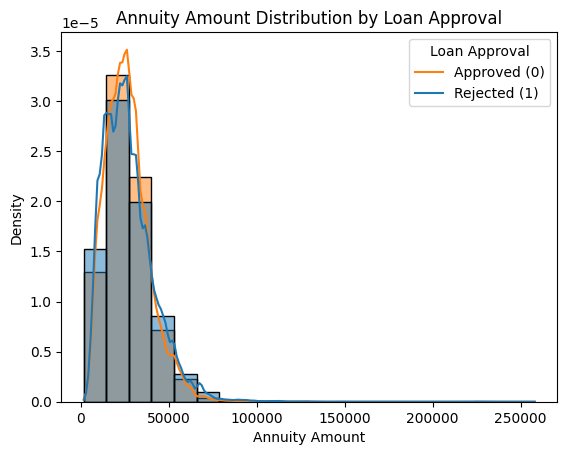

In [33]:
sns.histplot(data=df, x='AMT_ANNUITY', hue='TARGET', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Annuity Amount Distribution by Loan Approval')
plt.xlabel('Annuity Amount')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Annuities between 20,000 and 40,000 are more common among approved loans. This may reflect more manageable repayment plans.

#### 4. Goods Price

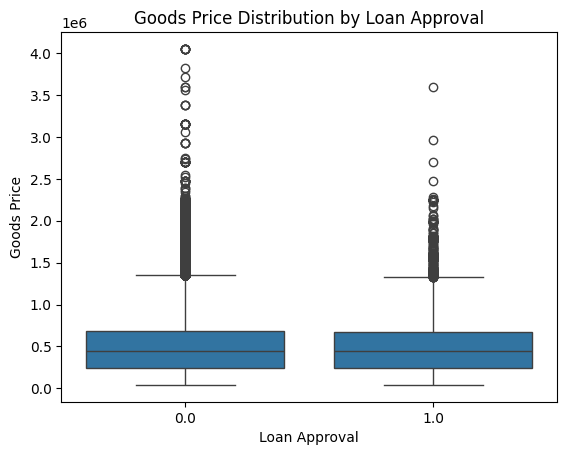

In [34]:
sns.boxplot(data=df, x='TARGET', y='AMT_GOODS_PRICE')
plt.title('Goods Price Distribution by Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Goods Price')
plt.show()

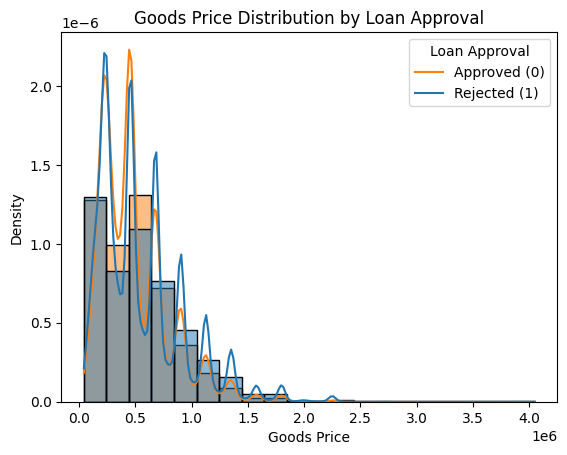

In [35]:
sns.histplot(data=df, x='AMT_GOODS_PRICE', hue='TARGET', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Goods Price Distribution by Loan Approval')
plt.xlabel('Goods Price')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

Loans intended for goods priced around 500,000 tend to be approved more frequently, suggesting a potential “sweet spot” in loanable purchase value.

#### 5. Credit Share

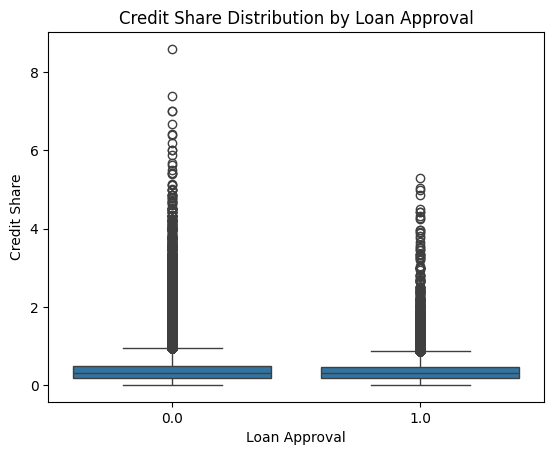

In [36]:
df = df[df['CREDIT_SHARE'] < 10]  # Remove extreme values

sns.boxplot(data=df, x='TARGET', y='CREDIT_SHARE')
plt.title('Credit Share Distribution by Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Credit Share')
plt.show()

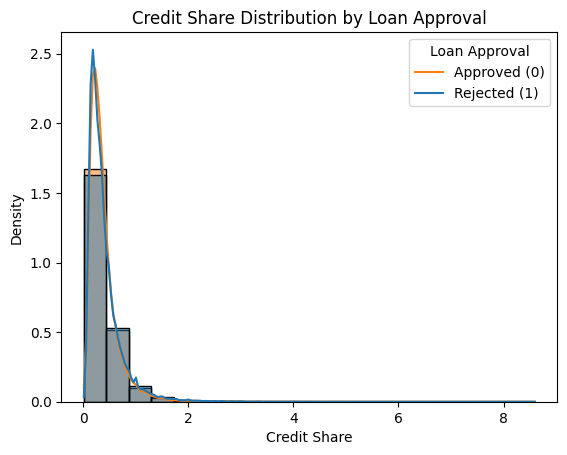

In [37]:
sns.histplot(data=df, x='CREDIT_SHARE', hue='TARGET', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Credit Share Distribution by Loan Approval')
plt.xlabel('Credit Share')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

The credit share gives insight into a borrower's debt-to-income ratio. Lower values generally indicate more financial capacity, which correlates with a higher likelihood of loan approval.

#### 6. Revenue Class

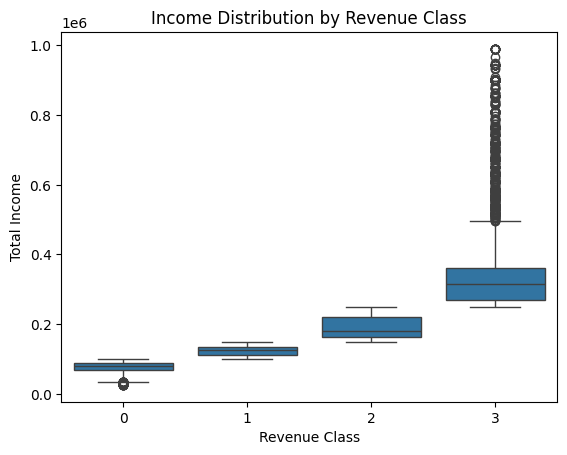

In [38]:
sns.boxplot(data=df, x='REVENUE_CLASS', y='AMT_INCOME_TOTAL')
plt.title('Income Distribution by Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Total Income')
plt.show()

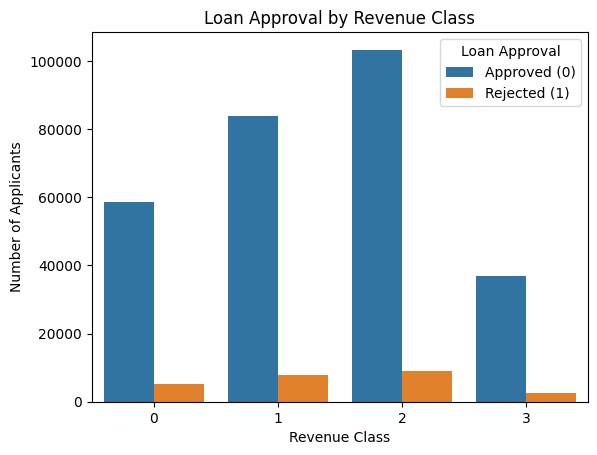

In [39]:
sns.countplot(data=df, x='REVENUE_CLASS', hue='TARGET')
plt.title('Loan Approval by Revenue Class')
plt.xlabel('Revenue Class')
plt.ylabel('Number of Applicants')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

In [40]:
df.groupby('REVENUE_CLASS')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2)).reset_index().rename(columns={'TARGET': 'Approval Rate (%)'})

,REVENUE_CLASS,Approval Rate (%)
0,0,91.80
1,1,91.38
2,2,91.85
3,3,93.59


We can see that there is a slightly higher chance of getting a loan if you are in the last class, but the difference is not very significant (around 1%).

#### 7. Number of Annuity Payments

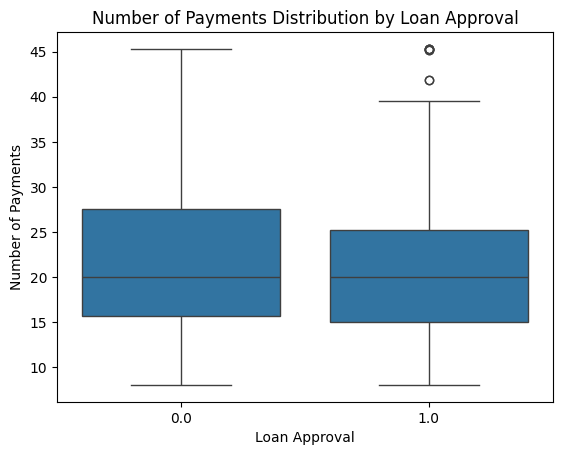

In [41]:
sns.boxplot(data=df, x='TARGET', y='NUM_ANNUITY')
plt.title('Number of Payments Distribution by Loan Approval')
plt.xlabel('Loan Approval')
plt.ylabel('Number of Payments')
plt.show()

This feature reflects the loan term. Fewer payments typically imply shorter repayment durations, which may be favored by lenders, especially when income is limited or unstable.

### D. Regional data and environment

#### 1. Region Population and Loan Approval

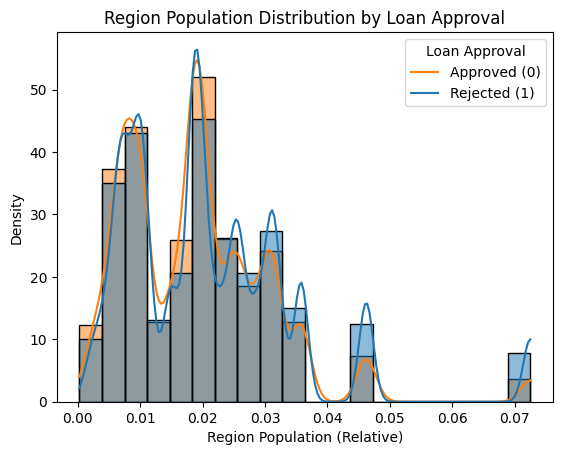

In [42]:
sns.histplot(data=df, x='REGION_POPULATION_RELATIVE', hue='TARGET', kde=True, bins=20, stat='density', common_norm=False)
plt.title('Region Population Distribution by Loan Approval')
plt.xlabel('Region Population (Relative)')
plt.ylabel('Density')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

The REGION_POPULATION_RELATIVE feature shows that individuals living in less densely populated regions (values below 0.28) are more likely to receive loan approval compared to those from more populated areas.

#### 2. Region Ratings and Loan Approval

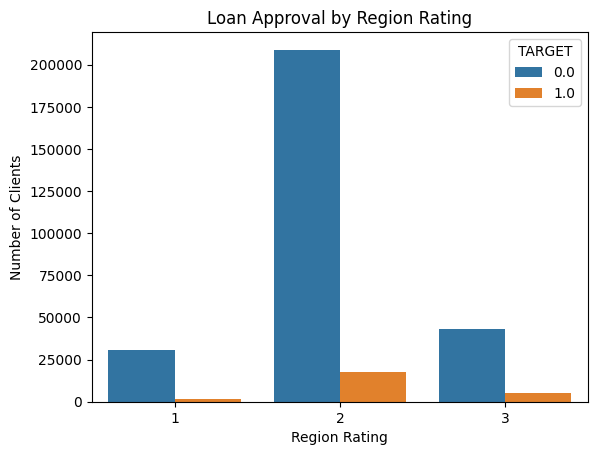

In [43]:
sns.countplot(data=df, x='REGION_RATING_CLIENT', hue='TARGET')
plt.title('Loan Approval by Region Rating')
plt.xlabel('Region Rating')
plt.ylabel('Number of Clients')
plt.show()

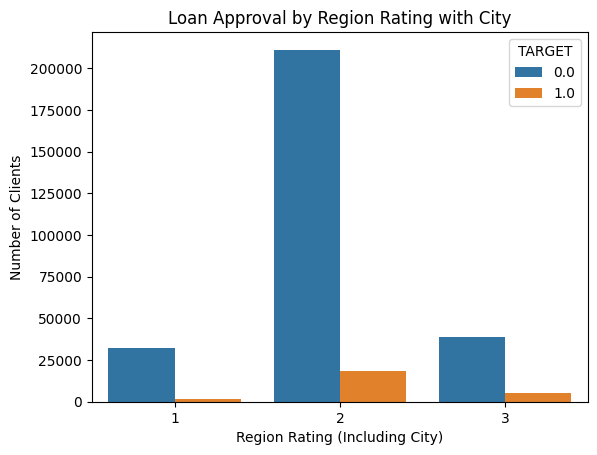

In [44]:
sns.countplot(data=df, x='REGION_RATING_CLIENT_W_CITY', hue='TARGET')
plt.title('Loan Approval by Region Rating with City')
plt.xlabel('Region Rating (Including City)')
plt.ylabel('Number of Clients')
plt.show()

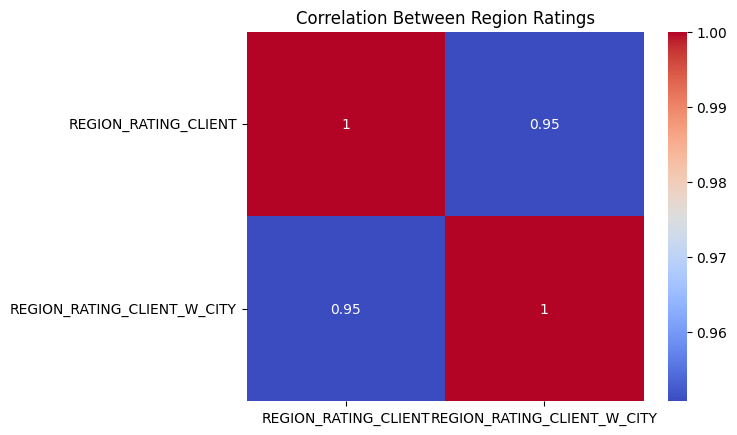

In [45]:
sns.heatmap(df[['REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Region Ratings')
plt.show()

There is a strong correlation between REGION_RATING_CLIENT and REGION_RATING_CLIENT_W_CITY, indicating that including city-level data does not add significant new information. Therefore, we will remove REGION_RATING_CLIENT_W_CITY to avoid redundancy.

#### 3. Regional Mobility Correlation

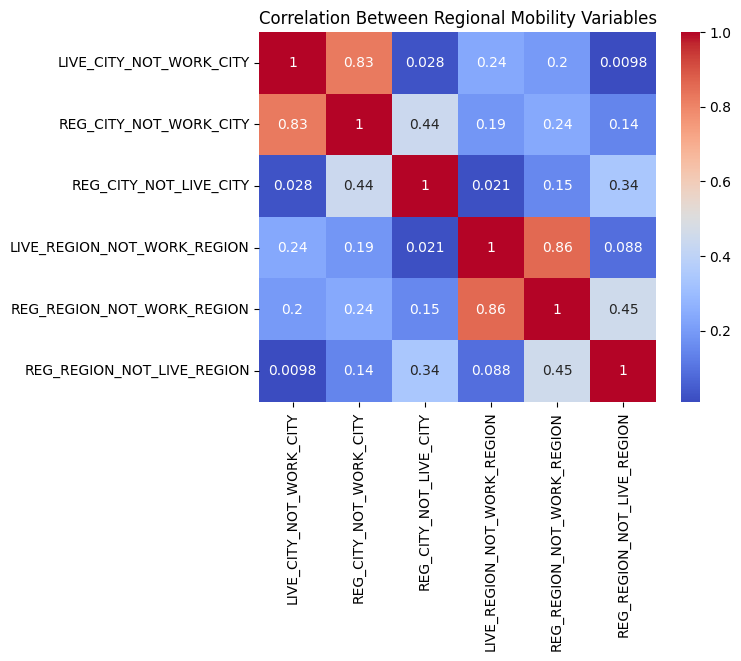

In [46]:
sns.heatmap(df[[
    'LIVE_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_WORK_CITY', 'REG_CITY_NOT_LIVE_CITY',
    'LIVE_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_WORK_REGION', 'REG_REGION_NOT_LIVE_REGION'
]].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between Regional Mobility Variables')
plt.show()

The heatmap above highlights several correlations among the regional mobility variables. However, it does not confirm a clear link between city-level and region-level mobility. To explore this further, we create two mobility scores: one based on region-level data, and one on city-level data. These scores assume that individuals who live, register, and work in different locations are less stable, which could impact their loan approval chances.

#### 4. Creating Mobility Scores

In [47]:
# Regional mobility score
df['MOBILITY_SCORE_BY_REGION'] = df[[
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'REG_REGION_NOT_LIVE_REGION'
]].sum(axis=1)

# City mobility score
df['MOBILITY_SCORE_BY_CITY'] = df[[
    'LIVE_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'REG_CITY_NOT_LIVE_CITY'
]].sum(axis=1)

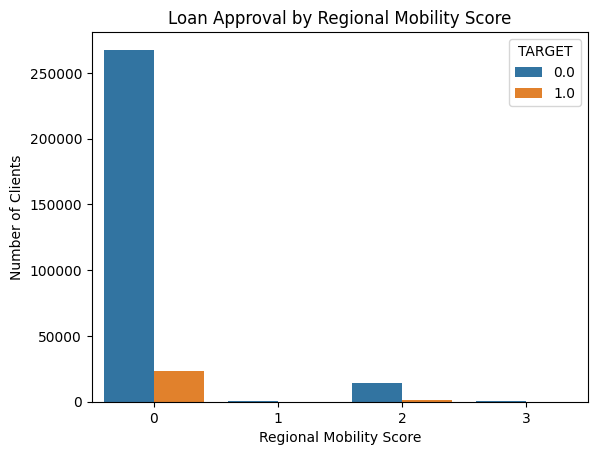

In [48]:
# Plotting mobility scores
sns.countplot(data=df, x='MOBILITY_SCORE_BY_REGION', hue='TARGET')
plt.title("Loan Approval by Regional Mobility Score")
plt.xlabel("Regional Mobility Score")
plt.ylabel("Number of Clients")
plt.show()

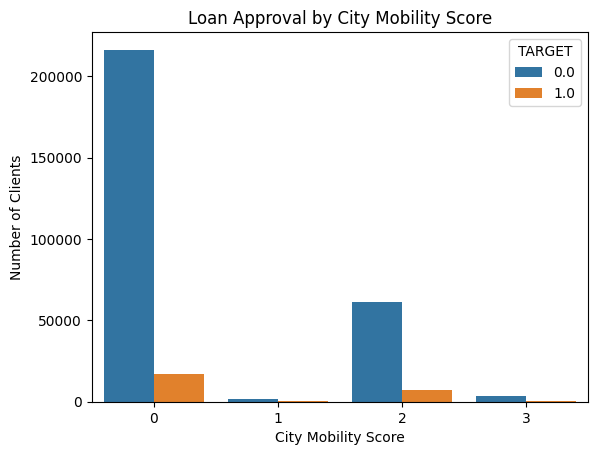

In [49]:
sns.countplot(data=df, x='MOBILITY_SCORE_BY_CITY', hue='TARGET')
plt.title('Loan Approval by City Mobility Score')
plt.xlabel('City Mobility Score')
plt.ylabel('Number of Clients')
plt.show()

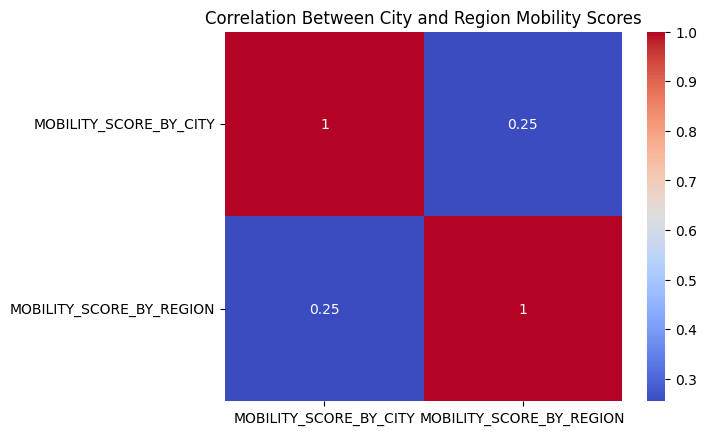

In [50]:
# Heatmap of the two mobility scores
sns.heatmap(df[['MOBILITY_SCORE_BY_CITY', 'MOBILITY_SCORE_BY_REGION']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Between City and Region Mobility Scores')
plt.show()

In [51]:
# Approval rates by mobility scores
approval_rate_by_region_score = df.groupby('MOBILITY_SCORE_BY_REGION')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2))
approval_rate_by_city_score = df.groupby('MOBILITY_SCORE_BY_CITY')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2))

print("Approval Rate by Region Mobility Score:")
print(approval_rate_by_region_score)

print("\nApproval Rate by City Mobility Score:")
print(approval_rate_by_city_score)

Approval Rate by Region Mobility Score:
MOBILITY_SCORE_BY_REGION
0    91.96
1    94.84
2    91.20
3    90.40
Name: TARGET, dtype: float64

Approval Rate by City Mobility Score:
MOBILITY_SCORE_BY_CITY
0    92.72
1    91.32
2    89.48
3    87.66
Name: TARGET, dtype: float64


The approval rates suggest that mobility plays a significant role in loan approval decisions. Applicants with lower city mobility scores (i.e., those whose place of residence, work, and registration are in the same city) have higher approval rates. This suggests that geographic stability is viewed positively by lenders.

However, caution is needed when interpreting this, as people living in rural areas may naturally need to travel further between their home, work, and administrative offices.

Conclusion: We choose to retain the city-level mobility score, which is more informative, and remove the region-level data to avoid redundancy and simplify our dataset for further analysis.

### E. Loan application form

#### 1. Contract Type and Loan Approval

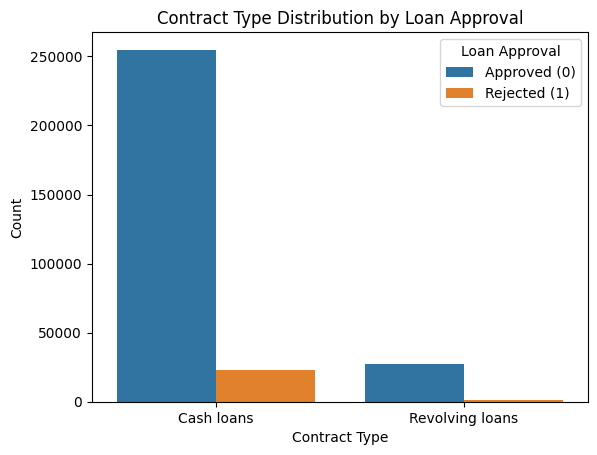

In [52]:
sns.countplot(x='NAME_CONTRACT_TYPE', hue='TARGET', data=df)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.title('Contract Type Distribution by Loan Approval')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.show()

In [53]:
approval_cash_loans_rate = df[(df['NAME_CONTRACT_TYPE'] == 'Cash loans') & (df['TARGET'] == 0)].shape[0] / df[df['NAME_CONTRACT_TYPE'] == 'Cash loans'].shape[0]
print("Approval rate for cash loans:", round(approval_cash_loans_rate * 100, 2), '%')

approval_revolving_loans_rate = df[(df['NAME_CONTRACT_TYPE'] == 'Revolving loans') & (df['TARGET'] == 0)].shape[0] / df[df['NAME_CONTRACT_TYPE'] == 'Revolving loans'].shape[0]
print("Approval rate for revolving loans:", round(approval_revolving_loans_rate * 100, 2), '%')

Approval rate for cash loans: 91.65 %
Approval rate for revolving loans: 94.51 %


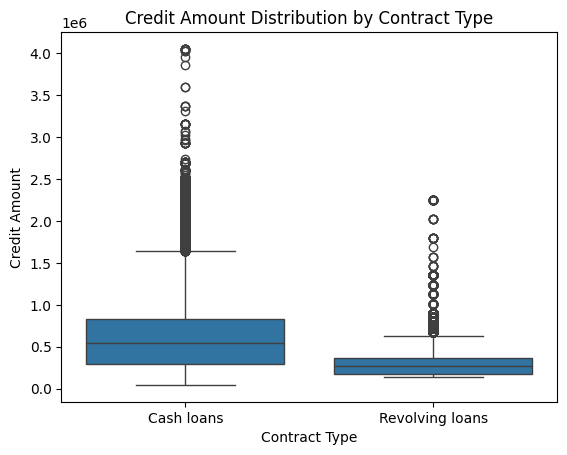

In [54]:
sns.boxplot(data=df, x='NAME_CONTRACT_TYPE', y='AMT_CREDIT')
plt.xlabel('Contract Type')
plt.ylabel('Credit Amount')
plt.title('Credit Amount Distribution by Contract Type')
plt.show()

Revolving loans have a significantly higher approval rate than cash loans. This can be explained by the nature of revolving credit, which typically involves smaller, short-term borrowing. These pose lower risk to banks, as opposed to cash loans which often involve larger, one-time amounts.
The type of loan has a clear impact on approval likelihood.

#### 2. Type of Suite (Who Is With the Applicant)

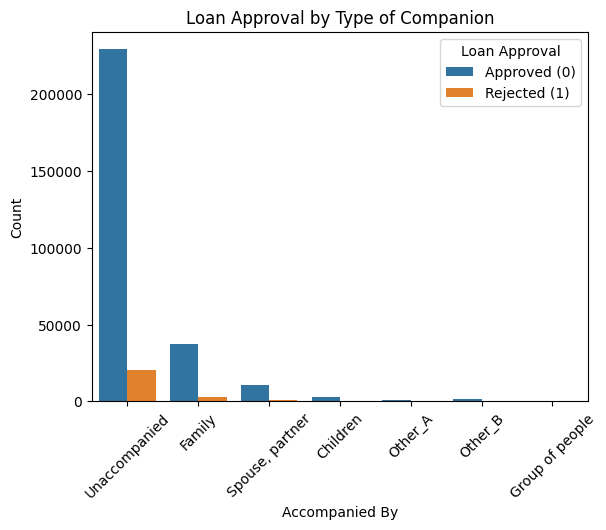

In [55]:
sns.countplot(x='NAME_TYPE_SUITE', hue='TARGET', data=df)
plt.xlabel('Accompanied By')
plt.ylabel('Count')
plt.title('Loan Approval by Type of Companion')
plt.legend(title='Loan Approval', labels=['Approved (0)', 'Rejected (1)'])
plt.xticks(rotation=45)
plt.show()

In [56]:
approval_rate_by_type_of_suite = df.groupby('NAME_TYPE_SUITE')['TARGET'].apply(lambda x: round((x == 0).mean() * 100, 2)).reset_index().rename(columns={'TARGET': 'Approval Rate (%)'}).sort_values(by='Approval Rate (%)', ascending=False)
print(approval_rate_by_type_of_suite)

   NAME_TYPE_SUITE  Approval Rate (%)
0         Children              92.62
1           Family              92.51
5  Spouse, partner              92.13
6    Unaccompanied              91.83
2  Group of people              91.51
3          Other_A              91.20
4          Other_B              90.16


Although the approval rate difference across suite types is relatively small (up to 2%), we observe slightly higher approval rates for applicants accompanied by family members or trusted individuals.

This may reflect how social context and perceived stability affect a bank’s decision. Applicants surrounded by supportive companions might be seen as more responsible or less risky

## V. Deleting Unnecessary Columns

With the data visualisation part, we have defined non-interesting columns and we have choose to remove some columns that are not necessary for prediction and are present in this dataset just for informations.

Based on our analysis, we will delete the following columns:
  - Unnamed: 0,
  - WEEKDAY_APPR_PROCESS_START,
  - SK_ID_CURR,
  - DAYS_REGISTRATION,
  - DAYS_ID_PUBLISH,
  - FLAG_MOBIL,
  - FLAG_EMP_PHONE,
  - FLAG_WORK_PHONE,
  - FLAG_CONT_MOBILE,
  - FLAG_PHONE,
  - FLAG_EMAIL,
  - HOUR_APPR_PROCESS_START,
  - REGION_RATING_CLIENT_W_CITY,
  - REG_REGION_NOT_LIVE_REGION,
  - REG_REGION_NOT_WORK_REGION,
  - LIVE_REGION_NOT_WORK_REGION,
  - MOBILITY_SCORE_BY_REGION,
  - CNT_FAM_MEMBERS,
  - FLAG_OWN_CAR,
  - FLAG_OWN_REALTY

In [57]:
df.drop(columns=[
    'Unnamed: 0',
    'WEEKDAY_APPR_PROCESS_START',
    'SK_ID_CURR',
    'DAYS_REGISTRATION',
    'DAYS_ID_PUBLISH',
    'FLAG_MOBIL',
    'FLAG_EMP_PHONE',
    'FLAG_WORK_PHONE',
    'FLAG_CONT_MOBILE',
    'FLAG_PHONE',
    'FLAG_EMAIL',
    'HOUR_APPR_PROCESS_START',
    'REGION_RATING_CLIENT_W_CITY',
    'REG_REGION_NOT_LIVE_REGION',
    'REG_REGION_NOT_WORK_REGION',
    'LIVE_REGION_NOT_WORK_REGION',
    'REG_CITY_NOT_LIVE_CITY',
    'REG_CITY_NOT_WORK_CITY',
    'LIVE_CITY_NOT_WORK_CITY',
    'MOBILITY_SCORE_BY_REGION',
    'CNT_FAM_MEMBERS',
    'FLAG_OWN_CAR',
    'FLAG_OWN_REALTY'
], inplace=True)

In [58]:
print("Number of columns:", len(df.columns))
print(df.columns)

Number of columns: 22
Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NUM_ANNUITY',
       'CREDIT_SHARE', 'LOANER_AGE', 'YEARS_EMPLOYED', 'REVENUE_CLASS',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE',
       'REGION_RATING_CLIENT', 'TARGET', 'OWNERSHIP_GROUP',
       'MOBILITY_SCORE_BY_CITY'],
      dtype='object')


## VI. Formatting Data for Machine Learning

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 307242 entries, 0 to 307510
Data columns (total 22 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   NAME_CONTRACT_TYPE          307242 non-null  object 
 1   CODE_GENDER                 307242 non-null  object 
 2   CNT_CHILDREN                307242 non-null  int64  
 3   AMT_INCOME_TOTAL            307242 non-null  float64
 4   AMT_CREDIT                  307242 non-null  float64
 5   AMT_ANNUITY                 307242 non-null  float64
 6   AMT_GOODS_PRICE             307242 non-null  float64
 7   NUM_ANNUITY                 307242 non-null  float64
 8   CREDIT_SHARE                307242 non-null  float64
 9   LOANER_AGE                  307242 non-null  int64  
 10  YEARS_EMPLOYED              307242 non-null  int64  
 11  REVENUE_CLASS               307242 non-null  int64  
 12  NAME_TYPE_SUITE             307242 non-null  object 
 13  NAME_INCOME_TYPE   

### A. Managing qualitative values

For our model, we will converted nominal variables to 0 and 1.

Then, we will one-hot encoded categorical variable.

In [60]:
# Nominal column treatment
df['CODE_GENDER'] = df['CODE_GENDER'].map({'F': 0, 'M': 1})

# Categorical column treatment
df = pd.get_dummies(df, columns=['NAME_CONTRACT_TYPE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'NAME_TYPE_SUITE', 'OWNERSHIP_GROUP'])

### B. Managing quantitative values

To optimize our model, we can normalize the continuous features to improve the results.
We will use a logarithmic transformation because it helps reduce the impact of extreme values and skewed distributions. By applying a log transformation, we bring the distribution closer to normality, which can help many machine learning models perform better and converge faster.

In [61]:
num_cols = ['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_GOODS_PRICE', 'AMT_ANNUITY',
            'CREDIT_SHARE', 'NUM_ANNUITY']

df[num_cols] = np.log1p(df[num_cols])

## VII. Machine Learning

To predict whether a loan will be approved, we framed this as a binary classification problem, where the target variable TARGET is:
- 0 for approved loans,
- 1 for rejected loans.

We evaluated multiple classifiers from scikit-learn to determine the most suitable model for our dataset, including:
- SGDClassifier (Stochastic Gradient Descent),
- LogisticRegression,
- KNeighborsClassifier,
- RandomForestClassifier,
- Support Vector Classifier (SVC).

Each model was assessed using key metrics:
- Accuracy: Overall correctness of the model,
- Precision: How many predicted positives were correct,
- Recall: How many actual positives were found,
- F1 Score: Harmonic mean of precision and recall.

In [86]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    classification_report,
    precision_score, recall_score, f1_score, roc_auc_score
)

from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

In [87]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [88]:
def evaluate_model(model, X_train, X_test, y_train, y_test, result_dict):
    model_name = model.__class__.__name__
    print(f"{model_name} is training.")

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(classification_report(y_test, y_pred))

    result_dict[model_name] = {
        'Accuracy': model.score(X_test, y_test),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1 Score': f1_score(y_test, y_pred)
    }

    print(f"{model_name} done!")


def plot_results(result_dict, title="Model Comparison by Metric"):
    df = pd.DataFrame(result_dict)
    print(df)

    scores_long = df.reset_index().melt(id_vars='index', var_name='Model', value_name='Score')
    scores_long.rename(columns={'index': 'Metric'}, inplace=True)

    plt.figure(figsize=(10, 6))
    sns.barplot(data=scores_long, x='Metric', y='Score', hue='Model')
    plt.title(title)
    plt.ylim(0, 1)
    plt.legend(title='Model')
    plt.grid(True)
    plt.show()

### A. Initial Model on Imbalanced Dataset

The dataset is highly imbalanced, with about 92% of loans being approved. We started by training a model directly on this imbalanced data:

In [89]:
print("TARGET distribution :", y.value_counts())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

TARGET distribution : TARGET
0.0    282430
1.0     24812
Name: count, dtype: int64


((245793, 48), (61449, 48), (245793,), (61449,))

SGDClassifier is training.
              precision    recall  f1-score   support

         0.0       0.97      0.07      0.13     56420
         1.0       0.09      0.98      0.16      5029

    accuracy                           0.15     61449
   macro avg       0.53      0.52      0.15     61449
weighted avg       0.90      0.15      0.14     61449

SGDClassifier done!
           SGDClassifier
Accuracy        0.145926
Precision       0.085643
Recall          0.975144
F1 Score        0.157457


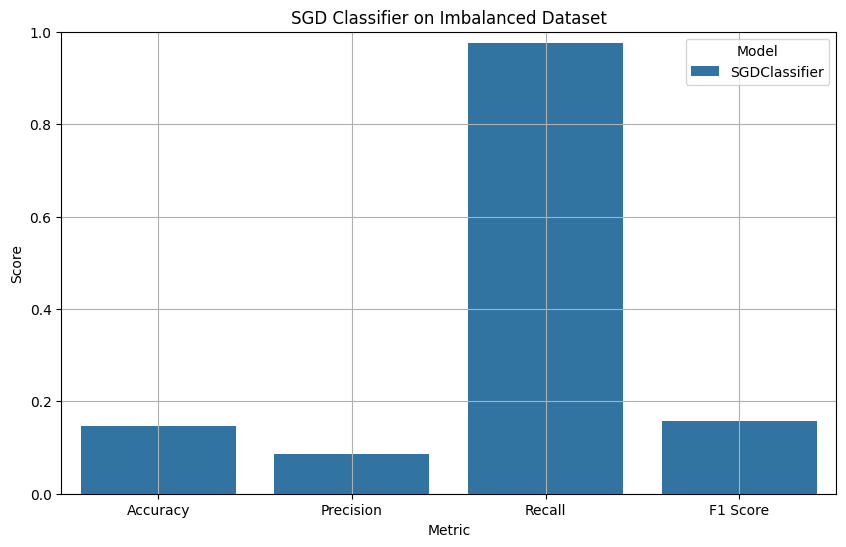

In [90]:
result = {}

sgd = SGDClassifier(loss='log_loss', penalty='elasticnet', class_weight='balanced')

evaluate_model(sgd, X_train, X_test, y_train, y_test, result)
plot_results(result, title="SGD Classifier on Imbalanced Dataset")

Despite using class_weight='balanced', the model achieved a low F1 score (~14%), indicating poor performance in handling imbalanced data. In particular, we observe that the model has very low precision for instances of the minority class (label = 1), suggesting that it predominantly predicts the majority class (label = 0). This bias is likely due to the severe class imbalance in the training data, which prevents the model from learning meaningful patterns for the minority class, even with weighting adjustments. This confirms the need to apply more robust strategies for addressing class imbalance prior to model training.

### B. Strategy 1: Oversampling (SMOTE)

We applied SMOTE (Synthetic Minority Over-sampling Technique) to artificially generate new examples of the minority class. SMOTE works by selecting a sample from the minority class and identifying its k nearest neighbors. Then, it generates new synthetic samples by interpolating between the selected instance and one or more of its neighbors. This creates more diverse yet realistic examples of the minority class, helping the model to better learn its characteristics and reducing the bias toward the majority class. Unlike simple duplication, SMOTE generates new data points in the feature space, which can lead to improved generalization and better classification performance.

In [91]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

print(f"Distribution after over-sampling : {Counter(y_resampled)}")

Distribution after over-sampling : Counter({1.0: 282430, 0.0: 282430})


In [92]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((451888, 48), (112972, 48), (451888,), (112972,))

SGDClassifier is training.
              precision    recall  f1-score   support

         0.0       0.91      0.41      0.56     56417
         1.0       0.62      0.96      0.75     56555

    accuracy                           0.68    112972
   macro avg       0.76      0.68      0.66    112972
weighted avg       0.76      0.68      0.66    112972

SGDClassifier done!
           SGDClassifier
Accuracy        0.683098
Precision       0.618356
Recall          0.958624
F1 Score        0.751780


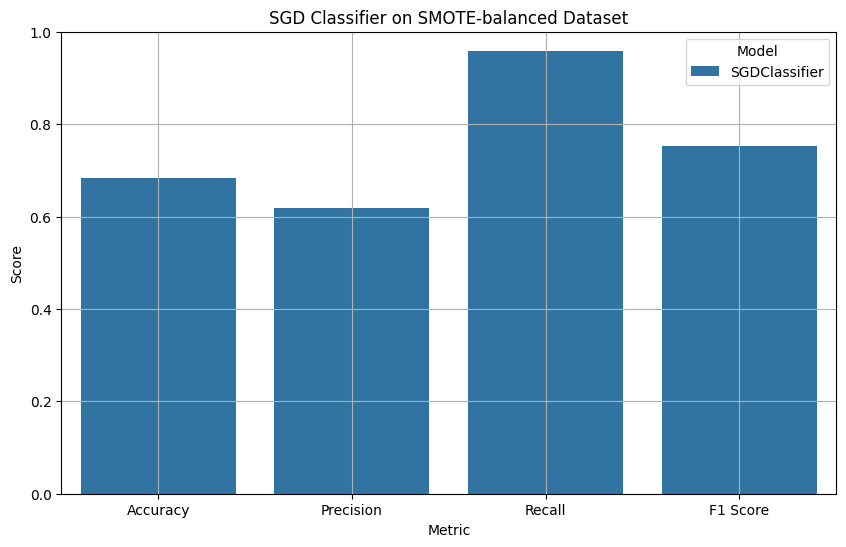

In [93]:
result={}

# Improve SGDClassifier for our conditions
sgd = SGDClassifier()

evaluate_model(sgd, X_train, X_test, y_train, y_test, result)
plot_results(result, title="SGD Classifier on SMOTE-balanced Dataset")

After applying over-sampling, we observed an overall improvement in the model's performance. Precision increased, indicating that the model made fewer false positive predictions. However, recall slightly decreased, suggesting that the model missed some true positive cases. This implies that, in situations where loans were actually approved, the model incorrectly predicted some of them as rejected, leading to a higher number of false positives. Nevertheless, achieving an F1-score above 80% represents a significant improvement and indicates a much better balance between precision and recall.

### C. Strategy 2: Hybrid Resampling (Under + Over Sampling)

To evaluate a broader range of models (e.g., KNN, RandomForest, LogisticRegression), we needed to reduce dataset size to <100,000 samples (as recommended in scikit-learn docs for those models).
We used a hybrid strategy:

1. Undersample the majority class (approved loans) :
This helps reduce the imbalance by removing some instances of the dominant class, which prevents the model from being biased toward predicting approvals. However, excessive undersampling could lead to loss of potentially valuable information, which is why we only partially reduced the majority class.

2. Oversample the minority class using SMOTE :
This enriches the minority class in a more diverse and informative way than naive duplication.

In [94]:
hybrid_pipeline = Pipeline([
    ('under', RandomUnderSampler(sampling_strategy=0.5, random_state=42)),
    ('smote', SMOTE(random_state=42))
])

X_resampled, y_resampled = hybrid_pipeline.fit_resample(X, y)
print(f"Distribution after pipeline : {Counter(y_resampled)}")

Distribution after pipeline : Counter({0.0: 49624, 1.0: 49624})


In [95]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((79398, 48), (19850, 48), (79398,), (19850,))

KNeighborsClassifier is training.
              precision    recall  f1-score   support

         0.0       0.78      0.61      0.69     10030
         1.0       0.67      0.82      0.74      9820

    accuracy                           0.72     19850
   macro avg       0.73      0.72      0.71     19850
weighted avg       0.73      0.72      0.71     19850

KNeighborsClassifier done!
RandomForestClassifier is training.
              precision    recall  f1-score   support

         0.0       0.71      0.72      0.71     10030
         1.0       0.71      0.70      0.70      9820

    accuracy                           0.71     19850
   macro avg       0.71      0.71      0.71     19850
weighted avg       0.71      0.71      0.71     19850

RandomForestClassifier done!
LogisticRegression is training.


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


              precision    recall  f1-score   support

         0.0       0.67      0.78      0.72     10030
         1.0       0.73      0.62      0.67      9820

    accuracy                           0.70     19850
   macro avg       0.70      0.70      0.70     19850
weighted avg       0.70      0.70      0.70     19850

LogisticRegression done!
SVC is training.


/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


              precision    recall  f1-score   support

         0.0       0.47      0.74      0.57     10030
         1.0       0.36      0.15      0.21      9820

    accuracy                           0.45     19850
   macro avg       0.41      0.44      0.39     19850
weighted avg       0.41      0.45      0.39     19850

SVC done!
           KNeighborsClassifier  RandomForestClassifier  LogisticRegression  \
Accuracy               0.716423                0.709572            0.698287   
Precision              0.674990                0.709344            0.732210   
Recall                 0.823116                0.699593            0.615071   
F1 Score               0.741730                0.704435            0.668548   

                SVC  
Accuracy   0.447254  
Precision  0.358546  
Recall     0.148676  
F1 Score   0.210193  


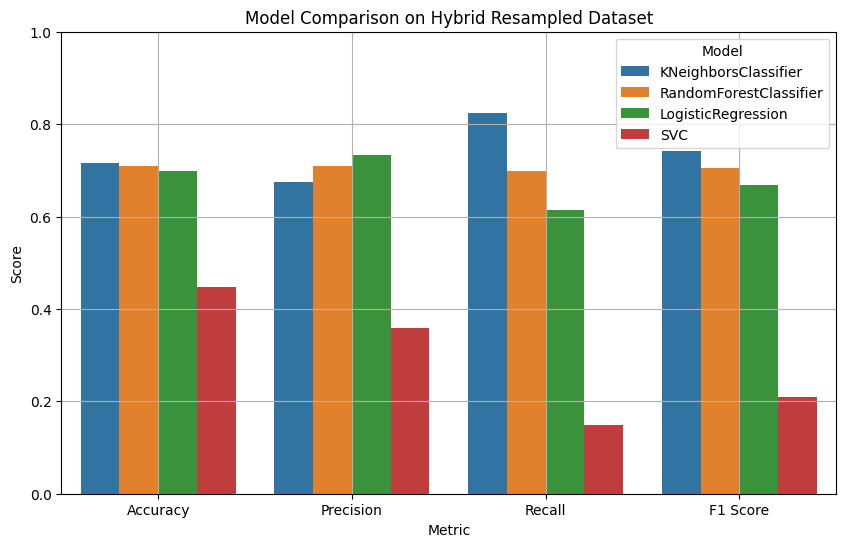

In [96]:
models = [
    KNeighborsClassifier(n_neighbors=3),
    RandomForestClassifier(n_estimators=7, criterion='entropy', random_state=42),
    LogisticRegression(),
    SVC(max_iter=1000)
]

result = {}
for model in models:
    evaluate_model(model, X_train, X_test, y_train, y_test, result)

plot_results(result, title="Model Comparison on Hybrid Resampled Dataset")

Results:
- KNN performed best among them with F1 ≈ 74%,
- Followed by RandomForestClassifier with F1 ≈ 70%,
- Logistic Regression and SVC trailed behind.

In conclusion, applying these techniques did not improve the reliability of our model. This outcome may be attributed to information loss caused by under-sampling, which likely reduced the diversity of training data and weakened the model’s ability to generalize.

## VIII. Deep Learning

We are now interested in exploring whether a deep learning model can outperform traditional machine learning approaches. To evaluate this, we apply over-sampling to our dataset and compare the results against our best-performing machine learning model so far: the SGDClassifier.

We arbitrarily design a simple neural network with two hidden layers and a final sigmoid activation, as this is a binary classification task. The model is trained using the Adam optimizer, which adaptively updates the network’s weights based on the magnitude and direction of the loss gradient, allowing for efficient convergence.

To prevent overfitting and unnecessary training, we use an EarlyStopping callback: if the validation performance does not improve over five consecutive epochs, training is halted.

Finally, model performance is primarily evaluated using the AUC metric, which provides a robust measure of class separation. We also track precision, recall, and F1-score to allow a comprehensive comparison with our previous models.

In [73]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint

In [74]:
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [75]:
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(
    X_resampled, y_resampled, test_size=0.2, random_state=42
)

In [80]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=['accuracy', 'auc']
)

history = model.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    verbose=1,
    epochs=50,
    callbacks=[
      EarlyStopping(
          monitor='val_auc',
          patience=5,
          restore_best_weights=True,
          mode='max'
      )
    ],
)
print(history.history)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 46s 3ms/step - accuracy: 0.7630 - auc: 0.8421 - loss: 0.4706 - val_accuracy: 0.8296 - val_auc: 0.9057 - val_loss: 0.3521
Epoch 2/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 45s 3ms/step - accuracy: 0.8299 - auc: 0.9041 - loss: 0.3522 - val_accuracy: 0.8348 - val_auc: 0.9095 - val_loss: 0.3447
Epoch 3/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 96s 4ms/step - accuracy: 0.8327 - auc: 0.9086 - loss: 0.3458 - val_accuracy: 0.8339 - val_auc: 0.9123 - val_loss: 0.3416
Epoch 4/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.8343 - auc: 0.9101 - loss: 0.3432 - val_accuracy: 0.8329 - val_auc: 0.9083 - val_loss: 0.3491
Epoch 5/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 79s 4ms/step - accuracy: 0.8341 - auc: 0.9097 - loss: 0.3442 - val_accuracy: 0.8369 - val_auc: 0.9154 - val_loss: 0.3363
Epoch 6/50
14122/14122 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.8375 - auc: 0.9135 - loss: 0.3371 - val_accuracy: 0.8404 - val_auc: 0.9159 - val_loss: 0.3337
Epoch 7/50

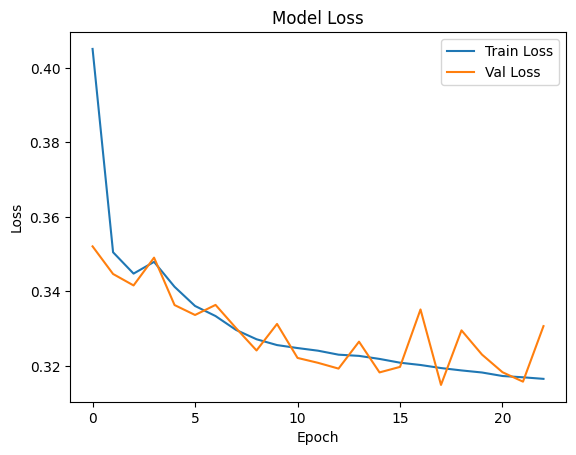

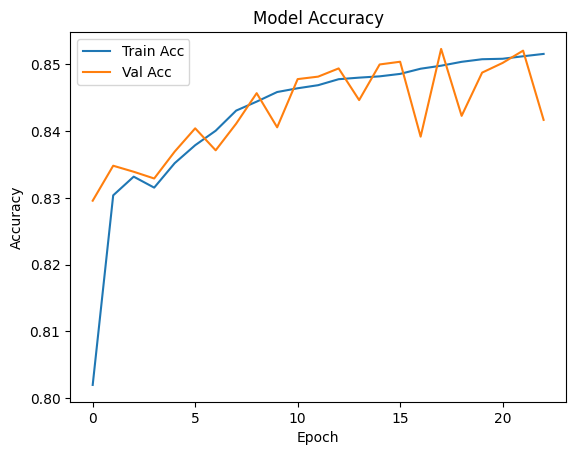

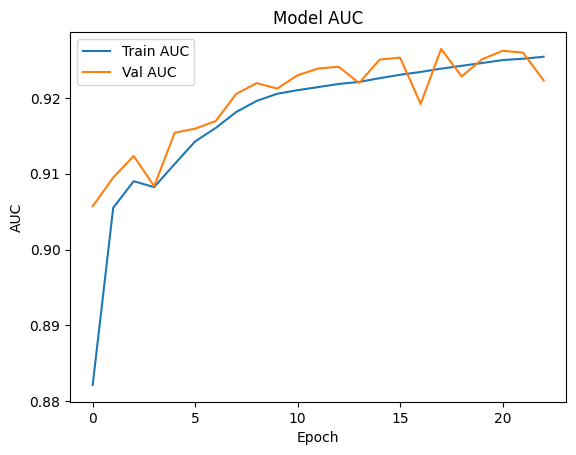

In [81]:
# Loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# AUC
plt.plot(history.history['auc'], label='Train AUC')
plt.plot(history.history['val_auc'], label='Val AUC')
plt.title('Model AUC')
plt.xlabel('Epoch')
plt.ylabel('AUC')
plt.legend()
plt.show()

In [84]:
# 1. Prédictions de probabilité
y_pred_prob = model.predict(X_test)

# 2. Conversion en classes (seuil 0.5)
y_pred = (y_pred_prob > 0.5).astype("int32")

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# 3. F1-score et autres métriques
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

3531/3531 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step

Classification Report:
              precision    recall  f1-score   support

         0.0       0.80      0.93      0.86     56417
         1.0       0.92      0.77      0.84     56555

    accuracy                           0.85    112972
   macro avg       0.86      0.85      0.85    112972
weighted avg       0.86      0.85      0.85    112972

Accuracy: 0.8523085366285451
Precision: 0.9201972935373719
Recall: 0.7719211387145257
F1 Score: 0.8395626796926834


In conclusion, our deep learning model demonstrates good generalization, as evidenced by the alignment of the training and validation curves for loss, accuracy, and AUC. The model achieves a solid F1-score of 83%, indicating a good balance between precision and recall at first glance.

However, upon closer inspection, we observe that precision is significantly higher than recall, revealing a tendency to produce false negatives. This suggests that the model is more conservative in flagging positive cases—likely to approve a loan when in doubt, which may not be ideal in a risk-sensitive context.

Given these findings, we conclude that the SGDClassifier remains the better choice in this scenario. It offers greater stability and superior overall performance in terms of class balance and decision reliability.

## IX. Conclusion

The model developed from loan application data showed strong performance, with a SGDClassifier achieving an F1-score of 80%. This approach enables reliable solvency prediction in most cases.

We believe that the bank likely evaluates clients using internal scoring systems based on proprietary coefficients and other domain-specific features. Access to this type of information could significantly enhance our model’s predictive power and improve its overall reliability.

To go further, it would be useful to explore more advanced models and improve data quality. Additionally, it is essential to consider the ethical and responsible AI aspects, which are addressed in the summary project document.